In [1]:
# Imports - these are all the imports needed for the assignment
%matplotlib inline
from scipy import stats
import numpy.ma as ma
from scipy.stats import kstest, normaltest

import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 1a) Load the nba csv files

# YOUR CODE HERE
df_2005 = pd.read_csv('clean_players_2005.csv')

In [4]:
df_2005

,Unnamed: 0,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,...,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,CFID,CFPARAMS
0,0,243,Aaron McKie,1610612747,LAL,33.0,14,9,5,0.643,...,440,434,444,450,321,417,233,20,5,"243,1610612747"
1,1,101223,Aaron Miles,1610612744,GSW,23.0,19,13,6,0.684,...,364,425,412,445,209,426,233,20,5,"101223,1610612744"
2,2,1425,Aaron Williams,1610612740,NOK,34.0,48,21,27,0.438,...,220,79,288,285,261,279,176,20,5,"1425,1610612740"
3,3,1502,Adonal Foyle,1610612744,GSW,31.0,77,32,45,0.416,...,241,97,282,293,220,185,143,20,5,"1502,1610612744"
4,4,1559,Adrian Griffin,1610612742,DAL,31.0,52,40,12,0.769,...,224,204,326,289,32,222,143,20,5,"1559,1610612742"
5,5,1733,Al Harrington,1610612737,ATL,26.0,76,24,52,0.316,...,25,1,46,34,440,49,43,20,5,"1733,1610612737"
6,6,2744,Al Jefferson,1610612738,BOS,21.0,59,23,36,0.390,...,67,90,170,188,355,181,99,20,5,"2744,1610612738"
7,7,101187,Alan Anderson,1610612766,CHA,23.0,36,7,29,0.194,...,146,347,277,243,170,297,233,20,5,"101187,1610612766"
8,8,673,Alan Henderson,1610612739,CLE,33.0,51,31,20,0.608,...,275,380,346,374,277,357,176,20,5,"673,1610612739"
9,11,947,Allen Iverson,1610612755,PHI,31.0,72,35,37,0.486,...,2,292,1,2,191,3,34,20,5,"947,1610612755"


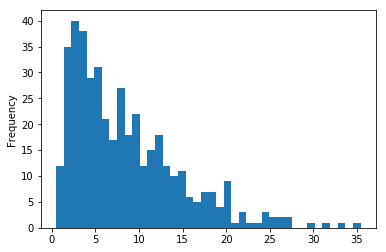

In [5]:
df_2005['PTS'].plot.hist(bins=40)

In [7]:
df_2005.columns[1:]
#pts_2016 = df_2016.as_matrix(columns=df_2016.columns[27:])
#x = pts_2016 #The array needs to be larger than 20, just an example
#mx = ma.masked_array(x)
#z,pval = mstats.normaltest(mx)

#if(pval < 0.055):
#   print("Not normal distribution")

Index(['PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION', 'AGE', 'GP',
       'W', 'L', 'W_PCT', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A',
       'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV',
       'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS',
       'NBA_FANTASY_PTS', 'DD2', 'TD3', 'GP_RANK', 'W_RANK', 'L_RANK',
       'W_PCT_RANK', 'MIN_RANK', 'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK',
       'FG3M_RANK', 'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK',
       'FT_PCT_RANK', 'OREB_RANK', 'DREB_RANK', 'REB_RANK', 'AST_RANK',
       'TOV_RANK', 'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK', 'PFD_RANK',
       'PTS_RANK', 'PLUS_MINUS_RANK', 'NBA_FANTASY_PTS_RANK', 'DD2_RANK',
       'TD3_RANK', 'CFID', 'CFPARAMS'],
      dtype='object')

In [18]:
z,pval = stats.normaltest(df_2005['PTS'])
print(z, pval)
if(pval < 0.05):
    print('PTS Is not from a Normal Dist')
else:
    print('PTS Is likley from a Normal Dist')

size = df_2005['PTS'].size
x = scipy.arange(size)
param = stats.gamma.fit(df_2005['PTS'])
stat, kpval = kstest(df_2005['PTS'], 'gamma', param)
print(stat, kpval)
if(kpval < 0.05):
    print('PTS Is not from a Gamma Dist')
else:
    print('PTS Is likley from a Gamma Dist')
    
param = stats.lognorm.fit(df_2005['PTS'])
stat, kpval = kstest(df_2005['PTS'], 'lognorm', param)
print(stat, kpval)
if(kpval < 0.05):
    print('PTS Is not from a Log norm Dist')
else:
    print('PTS Is likley from a Log norm Dist')

90.5334281659 2.19238014294e-20
PTS Is not from a Normal Dist
0.0462116163633 0.315760553333
PTS Is likley from a Gamma Dist
0.0532710719311 0.172944439484
PTS Is likley from a Log norm Dist


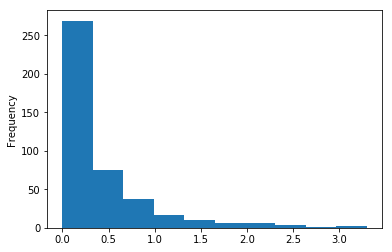

In [9]:
df_2005['BLK'].plot.hist(bins=10)

In [10]:
z,pval = stats.normaltest(df_2005['BLK'])
print(z, pval)
if(pval < 0.05):
    print('BLK Is not from a Normal Dist')
else:
    print('BLK Is likley from a Normal Dist')
    
size = df_2005['BLK'].size
x = scipy.arange(size)
param = stats.expon.fit(df_2005['BLK'])
stat, kpval = kstest(df_2005['BLK'], 'expon', param)
print(stat, kpval)
if(kpval < 0.05):
    print('BLK Is not from a Exponen Dist')
else:
    print('BLK Is likley from a Exponen Dist')
param = stats.gamma.fit(df_2005['BLK'])
stat, kpval = kstest(df_2005['BLK'], 'gamma', param)
print(stat, kpval)
if(kpval < 0.05):
    print('BLK Is not from a Gamma Dist')
else:
    print('BLK Is likley from a Gamma Dist')
param = stats.lognorm.fit(df_2005['BLK'])
stat, kpval = kstest(df_2005['BLK'], 'lognorm', param)
print(stat, kpval)
if(kpval < 0.05):
    print('BLK Is not from a Log norm Dist')
else:
    print('BLK Is likley from a Log norm Dist')
param = stats.chi2.fit(df_2005['BLK'])
stat, kpval = kstest(df_2005['BLK'], 'chi2', param)
print(stat, kpval)
if(kpval < 0.05):
    print('BLK Is not from a Chisq Dist')
else:
    print('BLK Is likley from a Chisq Dist')


242.828457759 1.86410500707e-53
BLK Is not from a Normal Dist
0.137729882001 1.70686797807e-07
BLK Is not from a Exponen Dist
0.431520166649 0.0
BLK Is not from a Gamma Dist
0.142023731731 6.07885868309e-08
BLK Is not from a Log norm Dist
0.240112407007 0.0
BLK Is not from a Chisq Dist


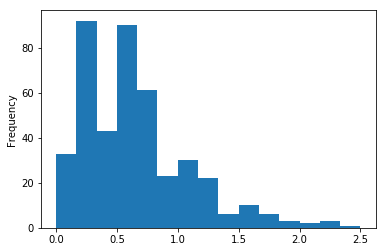

In [11]:
df_2005['STL'].plot.hist(bins=15)

In [12]:
z,pval = stats.normaltest(df_2005['STL'])
print(z, pval)
if(pval < 0.05):
    print('STL Is not from a Normal Dist')
else:
    print('STL Is likley from a Normal Dist')
    
size = df_2005['STL'].size
x = scipy.arange(size)
param = stats.gamma.fit(df_2005['STL'])
stat, kpval = kstest(df_2005['STL'], 'gamma', param)
print(stat, kpval)
if(kpval < 0.05):
    print('STL Is not from a Gamma Dist')
else:
    print('STL Is likley from a Gamma Dist')

param = stats.expon.fit(df_2005['STL'])
stat, kpval = kstest(df_2005['STL'], 'expon', param)
print(stat, kpval)
if(kpval < 0.05):
    print('STL Is not from a Exponen Dist')
else:
    print('STL Is likley from a Exponen Dist')

param = stats.lognorm.fit(df_2005['STL'])
stat, kpval = kstest(df_2005['STL'], 'lognorm', param)
print(stat, kpval)
if(kpval < 0.05):
    print('STL Is not from a Log norm Dist')
else:
    print('STL Is likley from a Log norm Dist')
    

91.4804410365 1.36544630918e-20
STL Is not from a Normal Dist
0.0685526067084 0.0351110742364
STL Is not from a Gamma Dist
0.215607077645 0.0
STL Is not from a Exponen Dist
0.0754074172802 0.0150838798549
STL Is not from a Log norm Dist


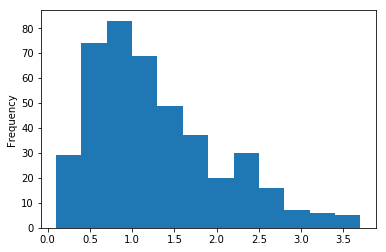

In [13]:
df_2005['TOV'].plot.hist(bins=12)

In [20]:
z,pval = mstats.normaltest(df_2005['TOV'])
print(z, pval)
if(pval < 0.05):
    print('TOV Is not from a Normal Dist')
else:
    print('TOV Is likley from a Normal Dist')
    
size = df_2005['TOV'].size
x = scipy.arange(size)
param = stats.gamma.fit(df_2005['TOV'])
stat, kpval = kstest(df_2005['TOV'], 'gamma', param)
print(stat, kpval)
if(kpval < 0.05):
    print('TOV Is not from a Gamma Dist')
else:
    print('TOV Is likley from a Gamma Dist')
    
param = stats.lognorm.fit(df_2005['TOV'])
stat, kpval = kstest(df_2005['TOV'], 'lognorm', param)
print(stat, kpval)
if(kpval < 0.05):
    print('TOV Is not from a Log norm Dist')
else:
    print('TOV Is likley from a Log norm Dist')

44.5899869187 2.07686069137e-10
TOV Is not from a Normal Dist
0.047434497808 0.286226385237
TOV Is likley from a Gamma Dist
0.0575947205257 0.114696827168
TOV Is likley from a Log norm Dist


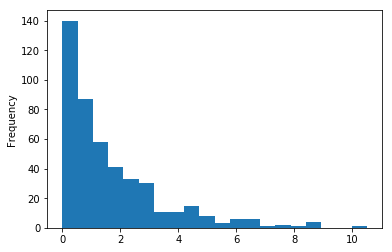

In [13]:
df_2005['AST'].plot.hist(bins=20)

In [14]:
z,pval = stats.normaltest(df_2005['AST'])
print(z, pval)
if(pval < 0.05):
    print('AST Is not from a Normal Dist')
else:
    print('AST Is likley from a Normal Dist')

size = df_2005['AST'].size
x = scipy.arange(size)
param = stats.gamma.fit(df_2005['AST'])
stat, kpval = kstest(df_2005['AST'], 'gamma', param)
print(stat, kpval)
if(kpval < 0.05):
    print('AST Is not from a Gamma Dist')
else:
    print('AST Is likley from a Gamma Dist')

param = stats.lognorm.fit(df_2005['AST'])
stat, kpval = kstest(df_2005['AST'], 'lognorm', param)
print(stat, kpval)
if(kpval < 0.05):
    print('AST Is not from a Log norm Dist')
else:
    print('AST Is likley from a Log norm Dist')

156.442113117 1.06912077332e-34
AST Is not from a Normal Dist
0.0611002852919 0.0803103879619
AST Is likley from a Gamma Dist
0.0509470660194 0.212839316175
AST Is likley from a Log norm Dist


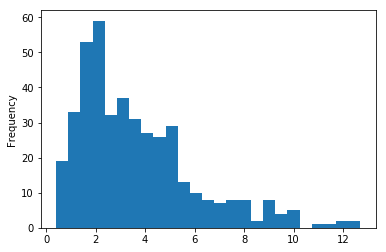

In [15]:
df_2005['REB'].plot.hist(bins=25)

In [21]:
z,pval = stats.normaltest(df_2005['REB'])
print(z, pval)
if(pval < 0.05):
    print('REB Is not from a Normal Dist')
else:
    print('REB Is likley from a Normal Dist')
    
size = df_2005['REB'].size
x = scipy.arange(size)
param = stats.gamma.fit(df_2005['REB'])
stat, kpval = kstest(df_2005['REB'], 'gamma', param)
print(stat, kpval)
if(kpval < 0.05):
    print('REB Is not from a Gamma Dist')
else:
    print('REB Is likley from a Gamma Dist')

param = stats.lognorm.fit(df_2005['REB'])
stat, kpval = kstest(df_2005['REB'], 'lognorm', param)
print(stat, kpval)
if(kpval < 0.05):
    print('REB Is not from a Log norm Dist')
else:
    print('REB Is likley from a Log norm Dist')

83.6564817501 6.82693550846e-19
REB Is not from a Normal Dist
0.0461465591044 0.317391836548
REB Is likley from a Gamma Dist
0.045077242543 0.345088046123
REB Is likley from a Log norm Dist
